In [1]:
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [4]:
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.values

n_samples = 1000
X_subset = X_train[:n_samples]
y_subset = y_train[:n_samples]

In [5]:
# Apply MDS
embedding = MDS(metric=True,n_components=2,eps=0.001)
train_transformed = embedding.fit_transform(X_subset)

# Apply Isomap
isomap = Isomap(n_components=2,n_neighbors=30)
transformed_isomap_data = isomap.fit_transform(X_subset)

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=7, random_state=42)
transformed_tsne_data = tsne.fit_transform(X_subset)

# Apply LLE 
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2)
transformed_lle_data = lle.fit_transform(X_subset)

# Apply Spectral
spectral = SpectralEmbedding(n_neighbors=10, n_components=2)
transformed_spectral_data = spectral.fit_transform(X_subset)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


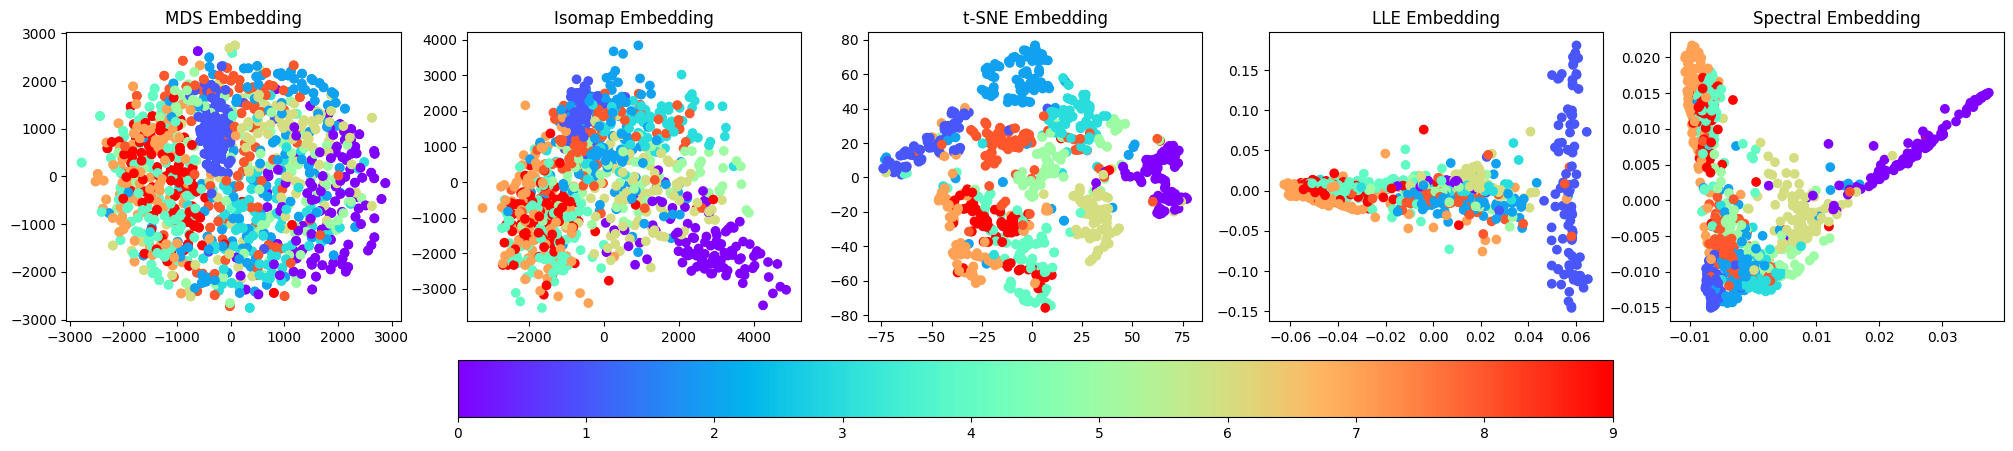

In [8]:
fig, axs = plt.subplots(1, 5, figsize=(25, 5))

# MDS
axs[0].scatter(train_transformed[:, 0], train_transformed[:, 1], c=y_subset, cmap='rainbow')
axs[0].set_title('MDS Embedding')

# Isomap
axs[1].scatter(transformed_isomap_data[:, 0], transformed_isomap_data[:, 1], c=y_subset, cmap='rainbow')
axs[1].set_title('Isomap Embedding')

# t-SNE
axs[2].scatter(transformed_tsne_data[:, 0], transformed_tsne_data[:, 1], c=y_subset, cmap='rainbow')
axs[2].set_title('t-SNE Embedding')

# LLE
axs[3].scatter(transformed_lle_data[:, 0], transformed_lle_data[:, 1], c=y_subset, cmap='rainbow')
axs[3].set_title('LLE Embedding')

# Spectral
axs[4].scatter(transformed_spectral_data[:, 0], transformed_spectral_data[:, 1], c=y_subset, cmap='rainbow')
axs[4].set_title('Spectral Embedding')

plt.colorbar(axs[0].scatter(train_transformed[:, 0], train_transformed[:, 1], c=y_subset, cmap='rainbow'), ax=axs, orientation='horizontal', pad=0.1)
plt.show()